In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow optuna



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import optuna
import joblib

C:\Users\marti\PycharmProjects\cuaderno_A.ipynb\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Carga el conjunto de datos
url = 'housing.csv'
data = pd.read_csv(url)
data["ocean_proximity"] = (data["ocean_proximity"] == "NEAR BAY").astype(int)

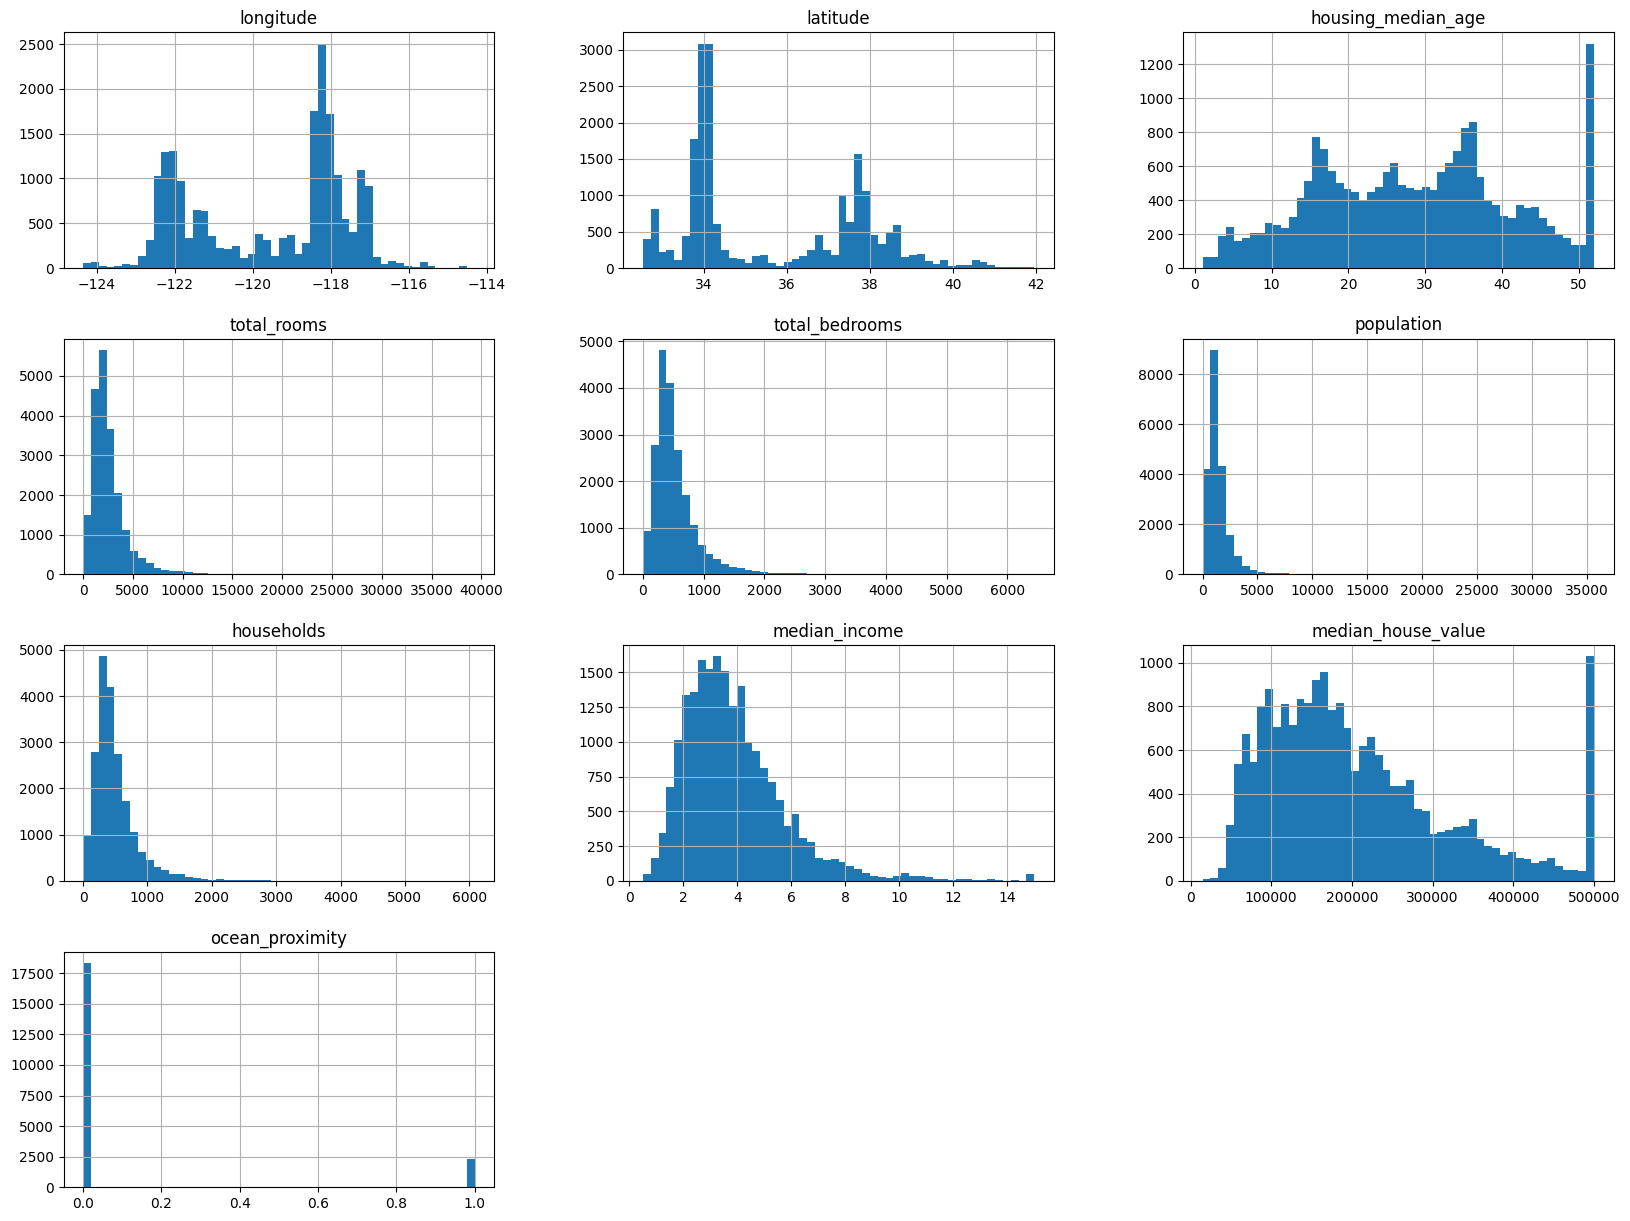

In [5]:
# Análisis Exploratorio de Datos (EDA)
data.hist(bins=50, figsize=(20, 15))
plt.show()

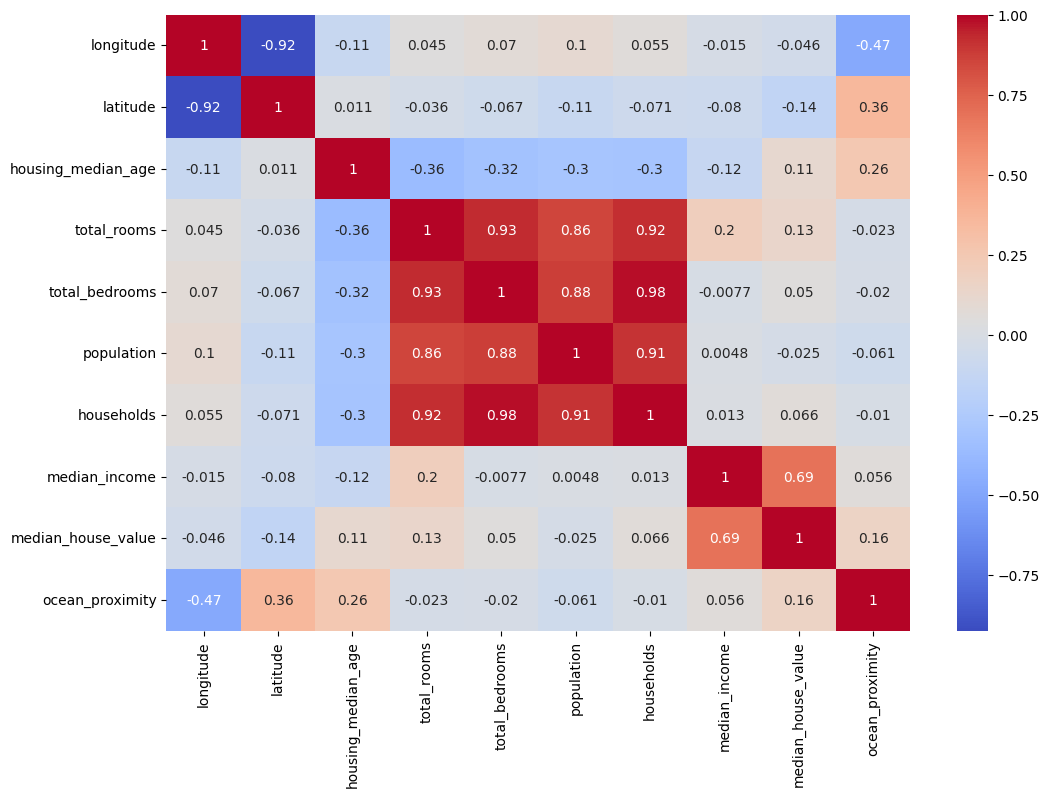

In [6]:
# Correlaciones
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Outliers - Tratamiento según sea necesario

# Valores Faltantes
missing_values = data.isnull().sum()
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
# Tipos de Datos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [9]:
# Ingeniería/Selección de Características + Limpieza de Datos
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X_train = train_data.drop("median_house_value", axis=1)
y_train = train_data["median_house_value"].copy()

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(test_data.drop("median_house_value", axis=1))

scaler = StandardScaler()
X_train_scaled_imputed = scaler.fit_transform(X_train_imputed)
X_test_scaled_imputed = scaler.transform(X_test_imputed)


In [13]:
# Importar NumPy
import numpy as np

# Guardar datos preprocesados (puedes almacenarlos en un Feature Store)
np.save('X_train.npy', X_train_scaled_imputed)
np.save('X_test.npy', X_test_scaled_imputed)
np.save('y_train.npy', y_train)
np.save('test_data.npy', test_data)
np.save('test_data_index.npy', test_data.index)

In [14]:
print(test_data.head())


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

       ocean_proximity  
20046                0  
3024                 0  
15663                1  
20484           